In [ ]:
# importing all the necessary library used

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB1,EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output

In [ ]:
#labelling all the directory

labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#adding path, resizing and adding to list

X_train = []
y_train = []
image_size = 240
dir = '/content/drive/MyDrive/b'
for i in labels:
    folderPath = os.path.join(dir,'Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(dir,'Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:48<00:00,  1.53it/s]


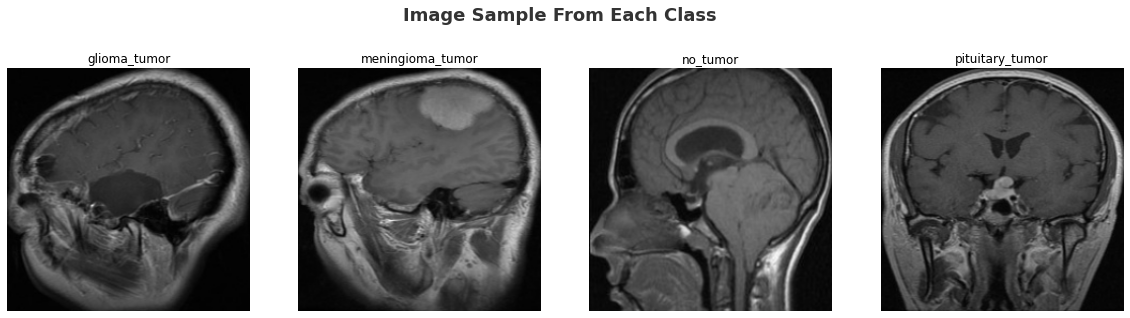

In [ ]:
#displaying mri from each directory

k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Image Sample From Each Class',size=18,fontweight='bold',
             y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
#shuffling mri from each folder so that every time new set is generated

X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
#spliting data in train and test set

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
#one hot encoding 

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
#checking number of images in each class in the training dataset

No_images_per_class = []
Class_name = []

for i in os.listdir('/content/drive/MyDrive/b/Training'):
  train_class = os.listdir(os.path.join('/content/drive/MyDrive/b/Training', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in pituitary_tumor = 827 

Number of images in no_tumor = 395 

Number of images in glioma_tumor = 826 

Number of images in meningioma_tumor = 822 



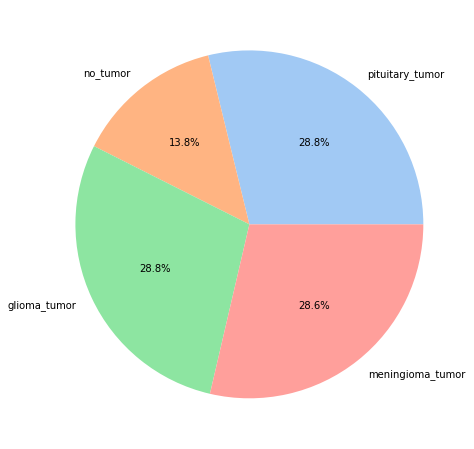

In [ ]:
#visualizing class distribution in train set

plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(No_images_per_class, 
        labels = Class_name, 
        autopct = '%1.1f%%',
        colors=colors)
plt.show()

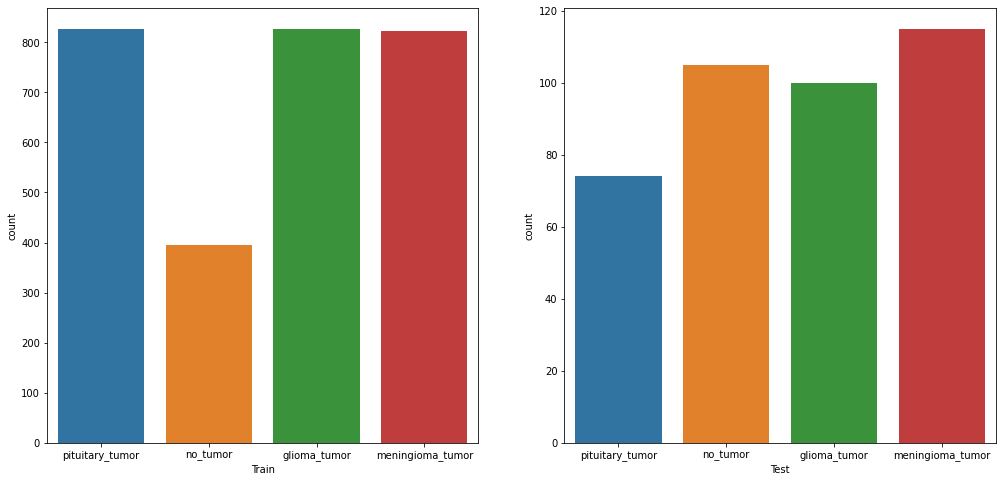

In [ ]:
#visualizing class distribution in train set and test set

train_labels = []
test_labels = []

dir = '/content/drive/MyDrive/b'

img_size= 240

for i in os.listdir(dir+'/Training/'):
    for j in os.listdir(dir+"/Training/"+i):
       train_labels.append(i)
        
for i in os.listdir(dir+'/Testing/'):
    for j in os.listdir(dir+"/Testing/"+i):
        test_labels.append(i)

plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

83697664/83683744 [==============================] - 2s 0us/step
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 119, 119, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 119, 119, 32  128        ['block1_conv1[0][0]']           
 ation)                    

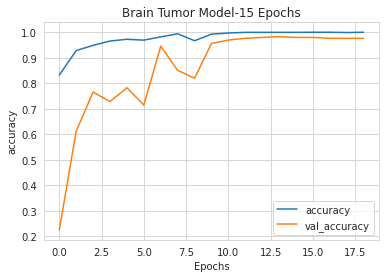

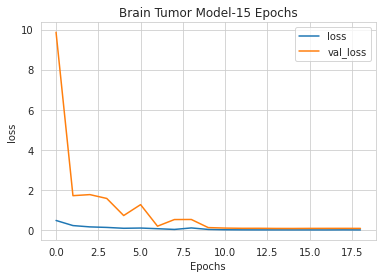

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        93
           1       0.96      0.95      0.95        95
           2       0.98      1.00      0.99        52
           3       0.98      1.00      0.99        87

    accuracy                           0.97       327
   macro avg       0.97      0.98      0.97       327
weighted avg       0.97      0.97      0.97       327



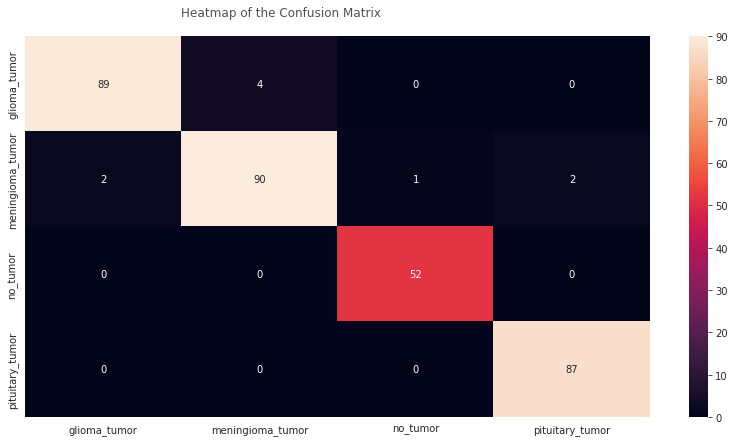

In [ ]:
#Xception

from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D


from tensorflow.keras.applications import Xception
image_size = 240
m = Xception(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

model = m.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=m.input, outputs = model)

model.summary()

model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("modelxception.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)


history = model.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,earlystop,reduce_lr])
#Visualize Training
def plot_graphs(history, string):
    sns.set_style("whitegrid")
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title("Brain Tumor Model-15 Epochs")
    plt.legend([string,"val_"+string])
    plt.show()
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

#classification report
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

#confusin matrix
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=12,y=0.92,x=0.28,alpha=0.8)

plt.show()

29097984/29084464 [==============================] - 0s 0us/step
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 246, 246, 3)  0          ['input_9[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 120, 120, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                           

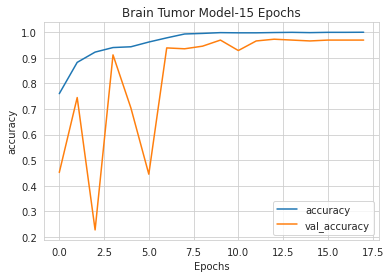

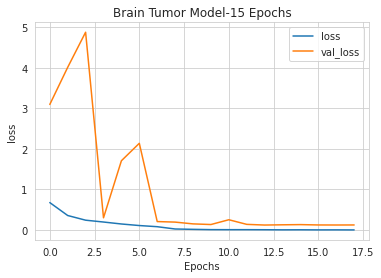

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        93
           1       0.94      0.96      0.95        95
           2       0.96      0.94      0.95        52
           3       0.98      1.00      0.99        87

    accuracy                           0.97       327
   macro avg       0.97      0.96      0.97       327
weighted avg       0.97      0.97      0.97       327



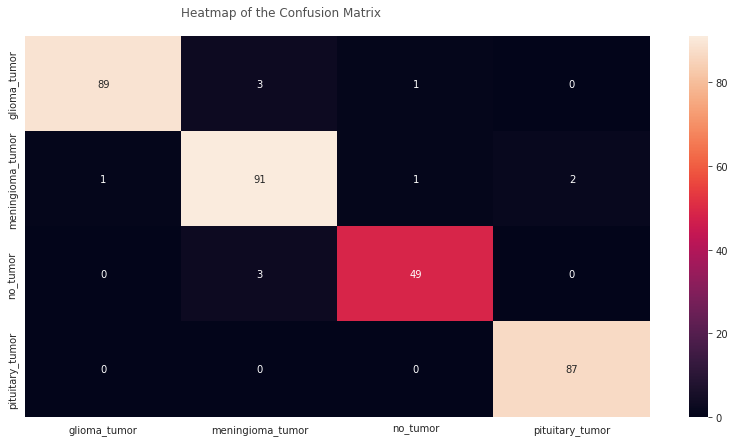

In [ ]:
#DenseNet

from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D

from tensorflow.keras.applications import DenseNet121
image_size = 240
m = DenseNet121(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

model = m.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=m.input, outputs = model)

model.summary()

model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("modeldensenet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)


history = model.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,earlystop,reduce_lr])
#Visualize Training
def plot_graphs(history, string):
    sns.set_style("whitegrid")
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title("Brain Tumor Model-15 Epochs")
    plt.legend([string,"val_"+string])
    plt.show()
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

#classification report
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

#confusin matrix
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=12,y=0.92,x=0.28,alpha=0.8)

plt.show()